<a href="https://colab.research.google.com/github/shanikairoshi/QFL-and-Deep-Unfolded-QFL/blob/main/Qiskit_QFL_with_qnn_genome_my_version.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:

%%capture
!pip install genomic-benchmarks
!pip install qiskit qiskit_machine_learning qiskit_algorithms
!pip install qiskit-aer

In [3]:
%%capture
!pip install qiskit
!pip install qiskit_machine_learning
!pip install qiskit-aer

In [4]:

from genomic_benchmarks.dataset_getters.pytorch_datasets import DemoHumanOrWorm

test_set = DemoHumanOrWorm(split='test', version=0)
train_set = DemoHumanOrWorm(split='train', version=0)

data_set = train_set
# data_set = train_set + test_set
len(data_set)


/usr/local/lib/python3.10/dist-packages/genomic_benchmarks/utils/datasets.py:11: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm
Downloading...
From (original): https://drive.google.com/uc?id=1JW0-eTB-rJXvFcglqBo3pFZi1kyIWC3X
From (redirected): https://drive.google.com/uc?id=1JW0-eTB-rJXvFcglqBo3pFZi1kyIWC3X&confirm=t&uuid=0b9afee4-3d1c-463d-a2e9-f16e773c4b48
To: /root/.genomic_benchmarks/demo_human_or_worm.zip
100%|██████████| 28.9M/28.9M [00:00<00:00, 51.2MB/s]


75000

In [5]:

print(f"Number of samples in the test set: {len(test_set)}")
print(f"Number of samples in the test set: {len(train_set)}")

Number of samples in the test set: 25000
Number of samples in the test set: 75000


In [6]:
from genomic_benchmarks.dataset_getters.pytorch_datasets import DemoHumanOrWorm

test_set = DemoHumanOrWorm(split='test', version=0)
train_set = DemoHumanOrWorm(split='train', version=0)

data_set = train_set
# data_set = train_set + test_set
len(data_set)

from collections import defaultdict
import numpy as np

word_size = 40
word_combinations = defaultdict(int)
iteration = 1
for text, _ in data_set:
    for i in range(len(text)):
        word = text[i:i+word_size]
        if word_combinations.get(word) is None:
          word_combinations[word] = iteration
          iteration += 1



print("First sample int the data_set variable: ")
print(data_set[0])

print("\nFirst 5 samples in the word_combinations dict.")
for key, value in list(word_combinations.items())[:5]:
    print(key, value)


import numpy as np
# Preprocess the training set
np_data_set = []
for i in range(len(data_set)):
    sequence, label = data_set[i]
    sequence = sequence.strip()  # Remove any leading/trailing whitespace
    words = [sequence[i:i + word_size] for i in range(0, len(sequence), word_size)]  # Split the sequence into 4-letter words
    int_sequence = np.array([word_combinations[word] for word in words])
    data_point = {'sequence': int_sequence, 'label': label}
    np_data_set.append(data_point)


print("First 5 samples of encoded data:")
np_data_set[:5]


np.random.shuffle(np_data_set)
print("First 5 samples of encoded shuffled data:")
np_data_set[:5]
from sklearn.preprocessing import MinMaxScaler

sequences = np.array([item['sequence'] for item in np_data_set])
sequences = np.vstack(sequences)

scaler = MinMaxScaler()

sequences_scaled = scaler.fit_transform(sequences)

for i, item in enumerate(np_data_set):
    item['sequence'] = sequences_scaled[i]

print("First 5 samples of scaled encoded shuffled data:")
np_data_set[:5]


np_train_data = np_data_set[:5000]
np_test_data = np_data_set[-500:]

print(f"Length of np_train_data: {len(np_train_data)}")
print(f"Length of np_test_data: {len(np_test_data)}")

test_sequences = [data_point["sequence"] for data_point in np_test_data]
test_labels = [data_point["label"] for data_point in np_test_data]
test_sequences = np.array(test_sequences)
test_labels = np.array(test_labels)


First sample int the data_set variable: 
('AAAATCAGTTTAGCTGAAGCATAATTTAAATTTTTCTTTACCATTCCGATCCTTCGTTGTCCTTGTCCTTGCTCTCGCCTCCCGATCCAACCATGCCTATCCGTGCCAATTCTCCATTCCGACCCATCCCGATCCATCCCGATCCATTACGATCCGATCAACCCATCCTAATCTTCGTCGTCGCGTCGATCTGTAAAAAA', 0)

First 5 samples in the word_combinations dict.
AAAATCAGTTTAGCTGAAGCATAATTTAAATTTTTCTTTA 1
AAATCAGTTTAGCTGAAGCATAATTTAAATTTTTCTTTAC 2
AATCAGTTTAGCTGAAGCATAATTTAAATTTTTCTTTACC 3
ATCAGTTTAGCTGAAGCATAATTTAAATTTTTCTTTACCA 4
TCAGTTTAGCTGAAGCATAATTTAAATTTTTCTTTACCAT 5
First 5 samples of encoded data:
First 5 samples of encoded shuffled data:
First 5 samples of scaled encoded shuffled data:
Length of np_train_data: 5000
Length of np_test_data: 500


In [ ]:
# Verify the structure of np_test_data
for i, data_point in enumerate(np_test_data[:5]):  # Print the first 5 test data points
    print(f"Test data point {i}: {data_point}")

Test data point 0: {'sequence': array([0.5360579, 0.5360579, 0.5360579, 0.5360579, 0.5360579]), 'label': 1}
Test data point 1: {'sequence': array([0.35626312, 0.35626312, 0.35626312, 0.35626312, 0.35626312]), 'label': 0}
Test data point 2: {'sequence': array([0.70987801, 0.70987801, 0.70987801, 0.70987801, 0.70987801]), 'label': 1}
Test data point 3: {'sequence': array([0.77066302, 0.77066302, 0.77066302, 0.77066302, 0.77066302]), 'label': 1}
Test data point 4: {'sequence': array([0.46368032, 0.46368032, 0.46368032, 0.46368032, 0.46368032]), 'label': 0}


In [14]:
import time
from qiskit.circuit.library import ZZFeatureMap, RealAmplitudes
from qiskit_algorithms.optimizers import COBYLA
from qiskit_machine_learning.algorithms.classifiers import VQC
from qiskit.primitives import BackendSampler
from functools import partial
from qiskit_aer import Aer


num_clients = 5
num_epochs = 100
max_train_iterations = 100
samples_per_epoch=100
backend = Aer.get_backend('aer_simulator')

class Client:
   def __init__(self, data, test_data):  # Add test_data to __init__
        self.data = data
        self.test_data = test_data  # Store test_data as an attribute
        self.models = []
        self.train_scores = []
        self.test_scores = []
        self.primary_model = None

def split_dataset(num_clients, num_epochs, samples_per_epoch):
  clients = []
  for i in range(num_clients):
    client_data = []
    for j in range(num_epochs):
      start_idx = (i*num_epochs*samples_per_epoch)+(j*samples_per_epoch)
      end_idx = (i*num_epochs*samples_per_epoch)+((j+1)*samples_per_epoch)
      client_data.append(np_train_data[start_idx:end_idx])
    # Pass test_data when creating Client instances
    clients.append(Client(client_data, np_test_data))
  return clients

clients = split_dataset(num_clients, num_epochs, samples_per_epoch)

In [ ]:

clients[0].data[0][:3] #display the data for the first client and its first epoch.

[{'sequence': array([0.81627711, 0.81627711, 0.81627711, 0.81627711, 0.81627711]),
  'label': 1},
 {'sequence': array([0.35218188, 0.35218188, 0.35218188, 0.35218188, 0.35218188]),
  'label': 0},
 {'sequence': array([0.95511434, 0.95511434, 0.95511434, 0.95511434, 0.95511434]),
  'label': 1}]

In [15]:
from qiskit_machine_learning.neural_networks import SamplerQNN
from qiskit_machine_learning.algorithms.classifiers import NeuralNetworkClassifier
from qiskit.circuit.library import ZZFeatureMap, RealAmplitudes
from qiskit.primitives import BackendSampler
from qiskit_algorithms.optimizers import SPSA
import numpy as np
import time
from IPython.display import clear_output
import matplotlib.pyplot as plt

# Callback function to visualize training progress
objective_func_vals = []
def callback_graph(weights, obj_func_eval):
    clear_output(wait=True)
    objective_func_vals.append(obj_func_eval)
    plt.title("Objective function value against iteration")
    plt.xlabel("Iteration")
    plt.ylabel("Objective function value")
    plt.plot(range(len(objective_func_vals)), objective_func_vals)
    plt.show()

In [20]:
import time
from qiskit.circuit.library import ZZFeatureMap, RealAmplitudes
from qiskit_algorithms.optimizers import COBYLA
from qiskit_machine_learning.algorithms.classifiers import VQC
from qiskit.primitives import BackendSampler
from functools import partial
from qiskit_aer import Aer


num_clients = 3
num_epochs = 20
max_train_iterations = 50
samples_per_epoch=100
backend = Aer.get_backend('aer_simulator')

class Client:
   def __init__(self, data, test_data):  # Add test_data to __init__
        self.data = data
        self.test_data = test_data  # Store test_data as an attribute
        self.models = []
        self.train_scores = []
        self.test_scores = []
        self.primary_model = None
'''
def split_dataset(num_clients, num_epochs, samples_per_epoch):
  clients = []
  for i in range(num_clients):
    client_data = []
    for j in range(num_epochs):
      start_idx = (i*num_epochs*samples_per_epoch)+(j*samples_per_epoch)
      end_idx = (i*num_epochs*samples_per_epoch)+((j+1)*samples_per_epoch)
      client_data.append(np_train_data[start_idx:end_idx])
    # Pass test_data when creating Client instances
    clients.append(Client(client_data, np_test_data))
  return clients

clients = split_dataset(num_clients, num_epochs, samples_per_epoch)
'''
def split_dataset(num_clients, num_epochs, samples_per_epoch):
    clients = []
    # Split test data across clients
    test_samples_per_client = len(np_test_data) // num_clients

    for i in range(num_clients):
        client_data = []
        for j in range(num_epochs):
            start_idx = (i * num_epochs * samples_per_epoch) + (j * samples_per_epoch)
            end_idx = (i * num_epochs * samples_per_epoch) + ((j + 1) * samples_per_epoch)
            client_data.append(np_train_data[start_idx:end_idx])

        # Assign a subset of the test data to each client
        test_start_idx = i * test_samples_per_client
        test_end_idx = (i + 1) * test_samples_per_client
        client_test_data = np_test_data[test_start_idx:test_end_idx]

        # Create Client instance with both train and test data
        clients.append(Client(client_data, client_test_data))

    return clients

clients = split_dataset(num_clients, num_epochs, samples_per_epoch)


In [ ]:
# Verify test data distribution across clients
for index, client in enumerate(clients):
    print(f"Client {index} Test Data Length: {len(client.test_data)}")

Client 0 Test Data Length: 1000
Client 1 Test Data Length: 1000
Client 2 Test Data Length: 1000
Client 3 Test Data Length: 1000
Client 4 Test Data Length: 1000


In [21]:
# Function to initialize a new QNN model (same architecture as clients' models)
def initialize_model(num_features):
    # Create the same quantum neural network (QNN) architecture as clients
    feature_map = ZZFeatureMap(feature_dimension=num_features, reps=2)
    ansatz = RealAmplitudes(num_qubits=num_features, reps=3)

    # Combine the feature map and ansatz into a single quantum circuit
    qc = feature_map.compose(ansatz)

    # Use parity as the interpretation function
    def parity(x):
        return "{:b}".format(x).count("1") % 2  # Binary classification

    # Explicitly define input_params and weight_params
    input_params = feature_map.parameters  # Input parameters (for encoding)
    weight_params = ansatz.parameters      # Trainable parameters (for optimization)

    # Define the QNN model using a sampler
    sampler_qnn = SamplerQNN(
        circuit=qc,
        interpret=parity,
        output_shape=2,  # Binary classification
        input_params=input_params,
        weight_params=weight_params
    )

    # Create a classifier using the neural network
    qnn_classifier = NeuralNetworkClassifier(
        neural_network=sampler_qnn,
        optimizer=SPSA(maxiter=50)  # Use SPSA optimizer
    )

    return qnn_classifier

# Function to create a model with averaged weights
def create_model_with_weights(average_weights, num_features):
    # Initialize a new QNN model with the same architecture
    model = initialize_model(num_features)
    # Assign the averaged weights to the model's trainable parameters (ansatz weights)
    weight_params = model.neural_network.weight_params  # Get the trainable parameters

    # Check if the lengths match, and truncate if necessary
    num_weights = min(len(average_weights), len(weight_params))

    # Create a dictionary mapping parameters to averaged weights
    param_dict = {param: average_weights[i] for i, param in enumerate(weight_params[:num_weights])}


    # Assign the averaged weights to the circuit parameters
    model.neural_network.circuit.assign_parameters(param_dict)

    return model


In [22]:
from qiskit_machine_learning.neural_networks import SamplerQNN
from qiskit_machine_learning.algorithms.classifiers import NeuralNetworkClassifier
from qiskit.circuit.library import ZZFeatureMap, RealAmplitudes
from qiskit.primitives import BackendSampler
from qiskit_algorithms.optimizers import SPSA
import numpy as np
import time
from IPython.display import clear_output
import matplotlib.pyplot as plt

# Callback function to visualize training progress
objective_func_vals = []
def callback_graph(weights, obj_func_eval):
    clear_output(wait=True)
    objective_func_vals.append(obj_func_eval)
    plt.title("Objective function value against iteration")
    plt.xlabel("Iteration")
    plt.ylabel("Objective function value")
    plt.plot(range(len(objective_func_vals)), objective_func_vals)
    plt.show()

# Function to create the QNN model
def create_qnn_model(data_train):
    num_features = data_train[0]["sequence"].shape[0]
    # Define the quantum feature map and ansatz
    feature_map = ZZFeatureMap(feature_dimension=num_features, reps=2)
    ansatz = RealAmplitudes(num_qubits=num_features, reps=3)

    # Construct the quantum neural network using a sampler

    qc = feature_map.compose(ansatz)  # Build the QNN circuit
    print(f"Number of features (input dimension): {num_features}")
    print(f"Number of circuit parameters: {qc.num_parameters}")

    # Use parity as the interpretation function
    def parity(x):
        return "{:b}".format(x).count("1") % 2  # Binary classification

    # Explicitly define input_params and weight_params
    input_params = feature_map.parameters  # Parameters for the feature map (inputs)
    weight_params = ansatz.parameters      # Parameters for the ansatz (weights)
    #print(f"Input Parameters: {input_params}")
    #print(f"Weight Parameters: {weight_params}")

    sampler_qnn = SamplerQNN(
        circuit=qc,
        interpret=parity,
        output_shape=2,  # Output dimension for binary classification
        input_params=input_params,       # Pass input parameters
        weight_params=weight_params     # Pass weight parameters
    )

    # Define a classifier using the QNN
    qnn_classifier = NeuralNetworkClassifier(
        neural_network=sampler_qnn,
        optimizer=SPSA(maxiter=50),  # Example with SPSA optimizer
        #callback=callback_graph
    )

    return qnn_classifier


In [23]:
def getAccuracy(weights, num_features, test_sequences, test_labels):
    # Rebuild the QNN model with the given weights
    feature_map = ZZFeatureMap(feature_dimension=num_features, reps=1)
    ansatz = RealAmplitudes(num_qubits=num_features, reps=3)

    # Replace bind_parameters with assign_parameters
    # Create a parameter dictionary for assignment
    param_dict = {param: weight for param, weight in zip(ansatz.parameters, weights)}
    ansatz = ansatz.assign_parameters(param_dict)

    # Rebuild the QNN using the updated ansatz
    qc = feature_map.compose(ansatz)

    # Define the parity function for binary classification
    def parity(x):
        return "{:b}".format(x).count("1") % 2

    # Build the SamplerQNN with the updated circuit
    sampler_qnn = SamplerQNN(
        circuit=qc,
        interpret=parity,
        output_shape=2,  # Binary classification
        input_params=feature_map.parameters,  # Input parameters (from the feature map)
        weight_params=ansatz.parameters  # Weight parameters (from the ansatz)
    )

    # Build the NeuralNetworkClassifier with the QNN
    qnn_classifier = NeuralNetworkClassifier(
        neural_network=sampler_qnn,
        optimizer=COBYLA(maxiter=0)  # No need for further optimization
    )

    # Train the classifier on a subset of test data (or use full test data if preferred)
    qnn_classifier.fit(test_sequences, test_labels)

    # Evaluate the model on a subset of the test data
    num_samples_to_evaluate = 200  # Adjust as needed
    subset_sequences = test_sequences[:num_samples_to_evaluate]
    subset_labels = test_labels[:num_samples_to_evaluate]

    # Return the accuracy on the subset
    return qnn_classifier.score(subset_sequences, subset_labels)


In [ ]:
import csv
# Lists to store accuracies over epochs
global_model_weights = {}
global_model_accuracy = []
clients_train_accuracies = []  # List to store train accuracies per epoch per client
clients_test_accuracies = []   # List to store test accuracies per epoch per client

# Function to train the QNN model for one client
def train_qnn_model(client_data,client_test_data, model=None):
    #num_features = client_data[0]["sequence"].shape[0]  # Get the feature dimension
    # Debug: Print the client data structure
    #for i, client in enumerate(clients):
        #print(f"Client {i} Test Data: {client.test_data}")
        #print(f"Test Data Length: {len(client.test_data)}")

    if model is None:
        # Create a new QNN model if one doesn't exist
        model = create_qnn_model(client_data)

    # Extract sequences and labels for training
    train_sequences = [data_point["sequence"] for data_point in client_data]
    train_labels = [data_point["label"] for data_point in client_data]

    # Extract sequences and labels for testing
    # Handle test data
    if isinstance(client_test_data, dict):
        # Single data point (dictionary format)
        test_sequences = np.array([client_test_data["sequence"]])
        test_labels = np.array([client_test_data["label"]])
    else:
        # List of dictionaries (multiple data points)
        test_sequences = [data_point["sequence"] for data_point in client_test_data]
        test_labels = [data_point["label"] for data_point in client_test_data]
        test_sequences = np.array(test_sequences)
        test_labels = np.array(test_labels)
    # Debug: Print the first few test sequences and labels for verification
    #print("First few test sequences:", test_sequences[:2])
    #print("First few test labels:", test_labels[:2])
    # Convert lists to NumPy arrays
    train_sequences = np.array(train_sequences)
    train_labels = np.array(train_labels)


    print("Training started...")
    start_time = time.time()

    # Train the QNN model
    model.fit(train_sequences, train_labels)

    end_time = time.time()
    elapsed_time = end_time - start_time
    print(f"Training completed in {elapsed_time} seconds.")

    # Evaluate the model on training and test data
    print(f"SCORING MODEL")
    train_score_q = model.score(train_sequences, train_labels)
    #test_score_q = model.score(test_sequences[:200], test_labels[:200])
    test_score_q = model.score(test_sequences, test_labels)

    return model, train_score_q, test_score_q, elapsed_time

# Function to extract numerical values of parameters
def extract_param_values(model):
    param_values = []
    # Loop through each parameter in the circuit and get its bound value
    for param in model.neural_network.circuit.parameters:
        # Extract the numerical value (assuming they are already bound with values)
        bound_value = model.neural_network.circuit._parameters[param]
        param_values.append(bound_value)
    return np.array(param_values)

# Function to set numerical values of parameters back into the circuit
def set_param_values(model, param_values):
    # Assign the averaged parameter values back to the circuit
    parameter_dict = {param: value for param, value in zip(model.neural_network.circuit.parameters, param_values)}
    model.neural_network.circuit.assign_parameters(parameter_dict)

# Manually average the numerical values of the parameters across clients
def manual_average_weights(epoch_weights):
    # Initialize a list to store the summed weights (initialize with zeros)
    num_weights = len(epoch_weights[0])  # Number of weights in the model
    num_clients = len(epoch_weights)  # Number of clients

    # Initialize sum of weights to zero (assuming NumPy array or list of weights)
    summed_weights = np.zeros(num_weights)

    # Sum the weights from all clients
    for client_weights in epoch_weights:
        summed_weights += np.array(client_weights)

    # Compute the average by dividing the summed weights by the number of clients
    average_weights = summed_weights / num_clients

    return average_weights


# Function to save accuracies to CSV
def save_accuracies_to_csv(global_accuracies, clients_train_accuracies, clients_test_accuracies, filename='accuracies.csv'):
    with open(filename, mode='w', newline='') as file:
        writer = csv.writer(file)

        # Write the header row
        header = ['Epoch', 'Global Accuracy']
        for i in range(len(clients_train_accuracies[0])):  # Assuming all clients have the same number of records
            header.append(f'Client {i} Train Accuracy')
            header.append(f'Client {i} Test Accuracy')
        writer.writerow(header)

        # Write the accuracy data for each epoch
        for epoch in range(len(global_accuracies)):
            row = [epoch, global_accuracies[epoch]]  # Start with epoch and global accuracy
            for client_index in range(len(clients_train_accuracies[epoch])):
                row.append(clients_train_accuracies[epoch][client_index])  # Add train accuracy for client
                row.append(clients_test_accuracies[epoch][client_index])   # Add test accuracy for client
            writer.writerow(row)

# Federated learning loop
num_features =5
for epoch in range(num_epochs):
    global_model_weights[epoch] = []
    epoch_weights = []

    epoch_train_accuracies = []  # Store train accuracies for this epoch
    epoch_test_accuracies = []   # Store test accuracies for this epoch
    print(f"Epoch: {epoch}")

    # Train each client
    for index, client in enumerate(clients):
        print(f"Training Client {index}")
        #print(f"Client {index} Test Data: {client.test_data}")  # Print the test data for this client

        if client.primary_model is None:
            # Pass both training and test data to the training function
            model, train_score_q, test_score_q, train_time = train_qnn_model(client.data[epoch], client.test_data)
            client.primary_model = model
        else:
            model, train_score_q, test_score_q, train_time = train_qnn_model(client.data[epoch], client.test_data, model=client.primary_model)

        client.models.append(model)
        client.train_scores.append(train_score_q)
        client.test_scores.append(test_score_q)

        print(f"Client {index} Train Score: {train_score_q}")
        print(f"Client {index} Test Score: {test_score_q}")
        print("\n\n")
        print("----------------------------------------------------------")

        # Append client accuracies for this epoch
        epoch_train_accuracies.append(train_score_q)
        epoch_test_accuracies.append(test_score_q)

        # Collect model weights
        # Assuming model.weights returns a NumPy array or list of weights
        epoch_weights.append(model.weights)

    if(epoch != 0):
     epoch_weights.append(global_model_weights[epoch-1])

    average_weights = sum(epoch_weights) / len(epoch_weights)

   # Manually compute the average weights
    #average_weights = manual_average_weights(epoch_weights)

    # Update the global model weights
    print("Global model updated")
    global_model_weights[epoch] = average_weights

    # Create a new model with the averaged global weights
    print("Create new model")
    new_model_with_global_weights = create_model_with_weights(global_model_weights[epoch],num_features)

    # Update each client's primary model with the new global weights
    for index, client in enumerate(clients):
        client.primary_model = new_model_with_global_weights

    # Calculate global accuracy using the test data
    global_accuracy = getAccuracy(global_model_weights[epoch], num_features, test_sequences, test_labels)
    global_model_accuracy.append(global_accuracy)

    # Save the clients' train/test accuracies for this epoch
    clients_train_accuracies.append(epoch_train_accuracies)
    clients_test_accuracies.append(epoch_test_accuracies)

    print(f"Global Model Accuracy In Epoch {epoch}: {global_accuracy:.2f}")
    print("----------------------------------------------------------")

    # Save accuracies to CSV after each epoch (or at the end of all epochs)
    save_accuracies_to_csv(global_model_accuracy, clients_train_accuracies, clients_test_accuracies, filename='accuracies.csv')



Epoch: 0
Training Client 0
Number of features (input dimension): 5
Number of circuit parameters: 25
Training started...


<ipython-input-22-af098e6a262a>:45: DeprecationWarning: V1 Primitives are deprecated as of qiskit-machine-learning 0.8.0 and will be removed no sooner than 4 months after the release date. Use V2 primitives for continued compatibility and support.
  sampler_qnn = SamplerQNN(


Visualizing Results

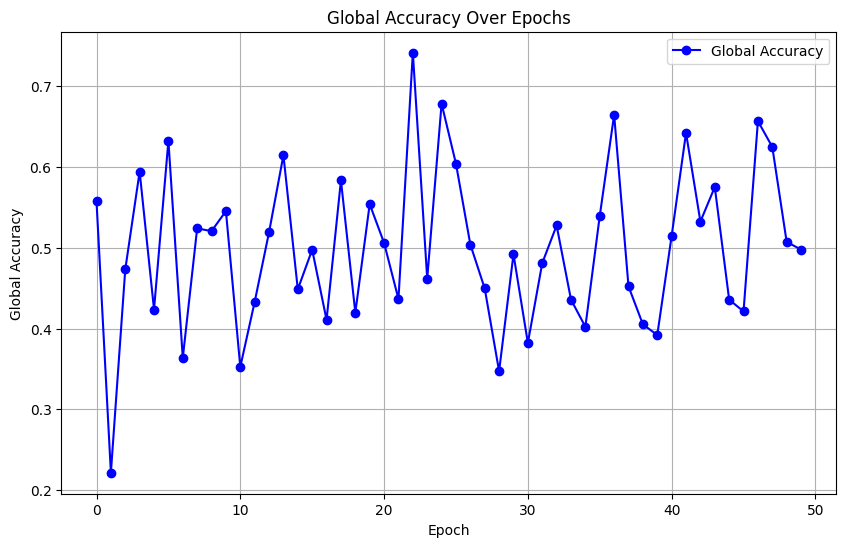

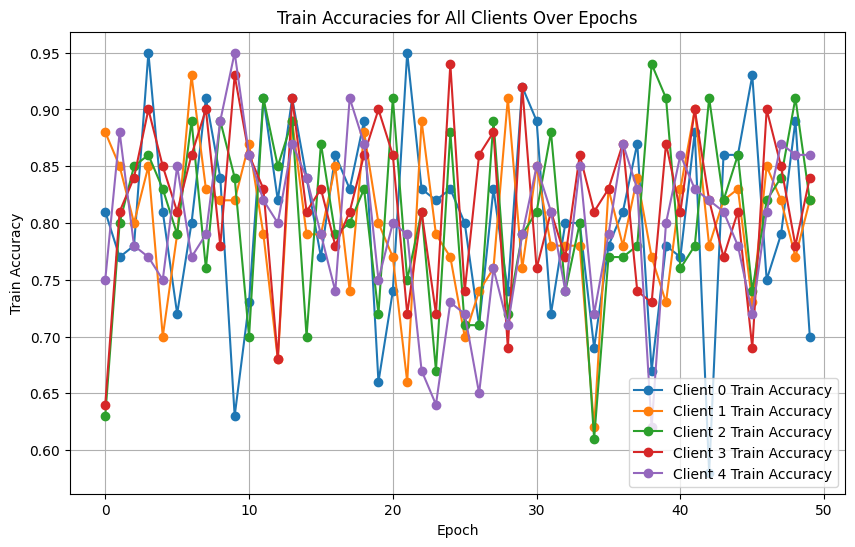

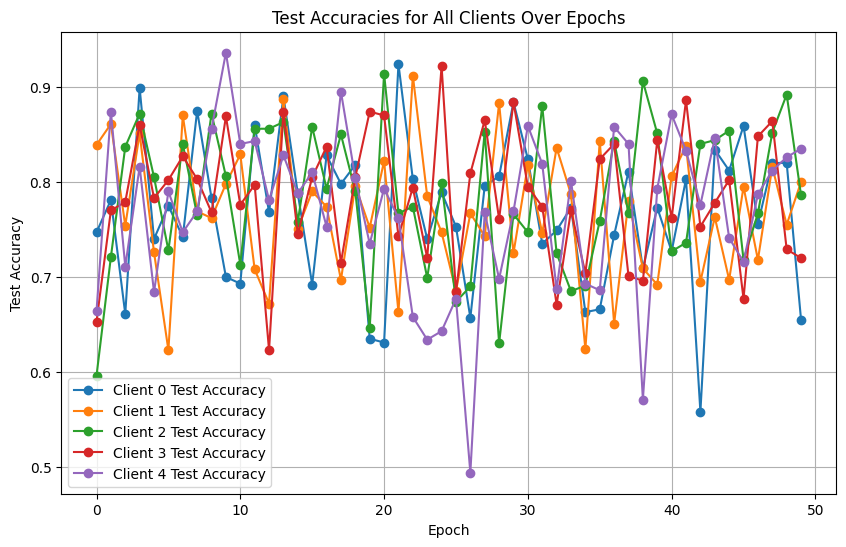

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Load the CSV file
filename = 'accuracies.csv'
data = pd.read_csv(filename)

# Extract the relevant columns for plotting
epochs = data['Epoch']
global_accuracy = data['Global Accuracy']
client_train_accuracies = data.filter(like='Train Accuracy').values
client_test_accuracies = data.filter(like='Test Accuracy').values

# Plot Global Accuracy over Epochs
plt.figure(figsize=(10, 6))
plt.plot(epochs, global_accuracy, label='Global Accuracy', color='blue', marker='o')
plt.xlabel('Epoch')
plt.ylabel('Global Accuracy')
plt.title('Global Accuracy Over Epochs')
plt.legend()
plt.grid(True)
plt.show()

# Plot Train Accuracies for all clients over Epochs
plt.figure(figsize=(10, 6))
for i in range(client_train_accuracies.shape[1]):
    plt.plot(epochs, client_train_accuracies[:, i], label=f'Client {i} Train Accuracy', marker='o')
plt.xlabel('Epoch')
plt.ylabel('Train Accuracy')
plt.title('Train Accuracies for All Clients Over Epochs')
plt.legend()
plt.grid(True)
plt.show()

# Plot Test Accuracies for all clients over Epochs
plt.figure(figsize=(10, 6))
for i in range(client_test_accuracies.shape[1]):
    plt.plot(epochs, client_test_accuracies[:, i], label=f'Client {i} Test Accuracy', marker='o')
plt.xlabel('Epoch')
plt.ylabel('Test Accuracy')
plt.title('Test Accuracies for All Clients Over Epochs')
plt.legend()
plt.grid(True)
plt.show()


new ways to average

In [ ]:
global_model_weights = {}
global_model_accuracy = []

# Federated learning loop
for epoch in range(num_epochs):
    global_model_weights[epoch] = []
    epoch_weights = []
    print(f"Epoch: {epoch}")

    # Train each client
    for index, client in enumerate(clients):
        print(f"Training Client {index}")

        if client.primary_model is None:
            # First time training: no existing model
            train_score_q, test_score_q, model = train(data=client.data[epoch])
            client.primary_model = model
        else:
            # Continue training with the existing model
            train_score_q, test_score_q, model = train(data=client.data[epoch], model=client.primary_model)

        # Save model and scores
        client.models.append(model)
        client.train_scores.append(train_score_q)
        client.test_scores.append(test_score_q)

        # Extract and collect model weights
        print(f"Train Score: {train_score_q}")
        print(f"Test Score: {test_score_q}")
        print("\n\n")

        # Assuming model.weights returns a NumPy array or list of weights
        epoch_weights.append(model.weights)

    # Average the weights across all clients
    average_weights = sum(epoch_weights) / len(epoch_weights)

    # Create a new model with the averaged global weights
    global_model_weights[epoch] = average_weights
    new_model_with_global_weights = create_model_with_weights(global_model_weights[epoch])

    # Update each client's primary model with the global averaged weights
    for index, client in enumerate(clients):
        client.primary_model = new_model_with_global_weights

    # Optionally calculate global accuracy (if applicable in your case)
    global_accuracy = getAccuracy(global_model_weights[epoch])  # Assuming getAccuracy() works with global weights
    global_model_accuracy.append(global_accuracy)

    print(f"Global Model Accuracy In Epoch {epoch}: {global_accuracy:.2f}")
    print("----------------------------------------------------------")


In [ ]:
# Function to extract numerical values of parameters
def extract_param_values(model):
    param_values = []
    # Loop through each parameter in the circuit and get its bound value
    for param in model.neural_network.circuit.parameters:
        # Extract the numerical value (assuming they are already bound with values)
        bound_value = model.neural_network.circuit._parameters[param]
        param_values.append(bound_value)
    return np.array(param_values)

# Function to set numerical values of parameters back into the circuit
def set_param_values(model, param_values):
    # Assign the averaged parameter values back to the circuit
    parameter_dict = {param: value for param, value in zip(model.neural_network.circuit.parameters, param_values)}
    model.neural_network.circuit.assign_parameters(parameter_dict)

# Federated learning loop
for epoch in range(num_epochs):
    global_model_weights[epoch] = []
    epoch_weights = []
    print(f"Epoch: {epoch}")

    # Train each client
    for index, client in enumerate(clients):
        print(f"Training Client {index}")

        if client.primary_model is None:
            # Pass both training and test data to the training function
            model, train_score_q, test_score_q, train_time = train_qnn_model(client.data[epoch], client.test_data[epoch])
            client.primary_model = model
        else:
            model, train_score_q, test_score_q, train_time = train_qnn_model(client.data[epoch], client.test_data[epoch], model=client.primary_model)

        client.models.append(model)
        client.train_scores.append(train_score_q)
        client.test_scores.append(test_score_q)

        print(f"Client {index} Train Score: {train_score_q}")
        print(f"Client {index} Test Score: {test_score_q}")
        print("  ")
        print("----------------------------------------------------------")

        # Collect model weights (extract numerical parameter values)
        param_values = extract_param_values(client.primary_model)
        epoch_weights.append(param_values)

    # Average the numerical values of the parameters across clients
    average_weights = np.mean(epoch_weights, axis=0)

    # Manually update each client's model parameters with the averaged weights
    global_model_weights[epoch] = average_weights

    for client in clients:
        # Manually set the global averaged weights to the model's parameters
        set_param_values(client.primary_model, global_model_weights[epoch])

    # Calculate global accuracy
    global_accuracy = getAccuracy(global_model_weights[epoch])

    # Print global accuracy for the epoch
    print(f"Global Model Accuracy In Epoch {epoch}: {global_accuracy:.2f}")
    print("----------------------------------------------------------")


33333333333333333333333333333333333333333333

In [ ]:
global_model_weights = {}
global_model_accuracy = []

# Function to train the QNN model for one client
def train_qnn_model(client_data,client_test_data, model=None):
    #num_features = client_data[0]["sequence"].shape[0]  # Get the feature dimension
    # Debug: Print the client data structure
    print("Client Test Data Structure:", client_test_data)
    if model is None:
        # Create a new QNN model if one doesn't exist
        model = create_qnn_model(client_data)

    # Extract sequences and labels for training
    train_sequences = [data_point["sequence"] for data_point in client_data]
    train_labels = [data_point["label"] for data_point in client_data]

    # Extract sequences and labels for testing
    # Handle test data
    if isinstance(client_test_data, dict):
        # Single data point (dictionary format)
        test_sequences = np.array([client_test_data["sequence"]])
        test_labels = np.array([client_test_data["label"]])
    else:
        # List of dictionaries (multiple data points)
        test_sequences = [data_point["sequence"] for data_point in client_test_data]
        test_labels = [data_point["label"] for data_point in client_test_data]
        test_sequences = np.array(test_sequences)
        test_labels = np.array(test_labels)

    # Convert lists to NumPy arrays
    train_sequences = np.array(train_sequences)
    train_labels = np.array(train_labels)


    print("Training started...")
    start_time = time.time()

    # Train the QNN model
    model.fit(train_sequences, train_labels)

    end_time = time.time()
    elapsed_time = end_time - start_time
    print(f"Training completed in {elapsed_time} seconds.")

    # Evaluate the model on training and test data
    train_score_q = model.score(train_sequences, train_labels)
    test_score_q = model.score(test_sequences, test_labels)

    return model, train_score_q, test_score_q, elapsed_time

# Federated learning loop
for epoch in range(num_epochs):
    global_model_weights[epoch] = []
    epoch_weights = []
    print(f"Epoch: {epoch}")

    # Train each client
    for index, client in enumerate(clients):
        print(f"Training Client {index}")

        if client.primary_model is None:
            # Pass both training and test data to the training function
            model, train_score_q, test_score_q, train_time = train_qnn_model(client.data[epoch], client.test_data[epoch])
            client.primary_model = model
        else:
            model, train_score_q, test_score_q, train_time = train_qnn_model(client.data[epoch], client.test_data[epoch], model=client.primary_model)

        client.models.append(model)
        client.train_scores.append(train_score_q)
        client.test_scores.append(test_score_q)

        print(f"Client {index} Train Score: {train_score_q}")
        print(f"Client {index} Test Score: {test_score_q}")
        print("  ")
        print("----------------------------------------------------------")

        for model in client.models:
        # Extract numerical values of parameters (as a NumPy array)
            param_values = [p.value for p in model.neural_network.circuit.parameters] # Extract the values
            epoch_weights.append(param_values)

    # Average the numerical values of the parameters across clients
    average_weights = np.mean(epoch_weights, axis=0)

    # Manually update each client's model parameters with the averaged weights
    global_model_weights[epoch] = average_weights

    for client in clients:
        # Manually set the global averaged weights to the model's parameters
        for i, param in enumerate(client.primary_model.neural_network.circuit.parameters):
            client.primary_model.neural_network.circuit._parameters[param] = average_weights[i] # Set the value directly


    # Calculate global accuracy
    global_accuracy = getAccuracy(global_model_weights[epoch])

    # Print global accuracy for the epoch
    print(f"Global Model Accuracy In Epoch {epoch}: {global_accuracy:.2f}")
    print("----------------------------------------------------------")


In [ ]:

import time

itr = 0
def training_callback(weights, obj_func_eval):
        global itr
        itr += 1
        print(f"{itr}", end=' | ')
def train(data, model = None):
  if model is None:
    num_features = len(data[0]["sequence"])
    feature_map = ZZFeatureMap(feature_dimension=num_features, reps=1)
    ansatz = RealAmplitudes(num_qubits=num_features, reps=3)
    optimizer = COBYLA(maxiter=max_train_iterations)
    vqc_model = VQC(
        feature_map=feature_map,
        ansatz=ansatz,
        optimizer=optimizer,
        callback=partial(training_callback),
        sampler=BackendSampler(backend=backend),
        warm_start=True
    )
    model = vqc_model

  train_sequences = [data_point["sequence"] for data_point in data]
  train_labels = [data_point["label"] for data_point in data]

  # Convert the lists to NumPy arrays
  train_sequences = np.array(train_sequences)
  train_labels = np.array(train_labels)

  # Print the shapes
  print("Train Sequences Shape:", train_sequences.shape)
  print("Train Labels Shape:", train_labels.shape)

  print("Training Started")
  start_time = time.time()
  model.fit(train_sequences, train_labels)
  end_time = time.time()
  elapsed_time = end_time - start_time
  print(f"\nTraining complete. Time taken: {elapsed_time} seconds.")

  print(f"SCORING MODEL")
  train_score_q = model.score(train_sequences, train_labels)
  test_score_q = model.score(test_sequences[:200], test_labels[:200])
  return train_score_q, test_score_q, model

def getAccuracy(weights):
        num_features = len(test_sequences[0])
        feature_map = ZZFeatureMap(feature_dimension=num_features, reps=1)
        ansatz = RealAmplitudes(num_qubits=num_features, reps=3)
        ansatz = ansatz.bind_parameters(weights)
        optimizer = COBYLA(maxiter=0)
        vqc = VQC(
            feature_map=feature_map,
            ansatz=ansatz,
            optimizer=optimizer,
            sampler=BackendSampler(backend=backend)
        )
        vqc.fit(test_sequences[:25], test_labels[:25])
        return vqc.score(test_sequences[:200], test_labels[:200])

def create_model_with_weights(weights):
  num_features = len(test_sequences[0])
  feature_map = ZZFeatureMap(feature_dimension=num_features, reps=1)
  ansatz = RealAmplitudes(num_qubits=num_features, reps=3)
  optimizer = COBYLA(maxiter=max_train_iterations)
  vqc = VQC(
      feature_map=feature_map,
      ansatz=ansatz,
      optimizer=optimizer,
      sampler=BackendSampler(backend=backend),
      warm_start = True,
      initial_point  = weights,
      callback=partial(training_callback)
  )
  return vqc


global_model_weights = {}
global_model_accuracy = []

for epoch in range(num_epochs):
  global_model_weights[epoch] = []
  epoch_weights = []
  print(f"epoch: {epoch}")
  for index, client in enumerate(clients):
    print(f"Index: {index}, Client: {client}")

    if client.primary_model is None:
      train_score_q, test_score_q, model = train(data = client.data[epoch])
      client.models.append(model)
      client.test_scores.append(test_score_q)
      client.train_scores.append(train_score_q)
      # Print the values
      print("Train Score:", train_score_q)
      print("Test Score:", test_score_q)
      print("\n\n")
      epoch_weights.append(model.weights)

    else:
      train_score_q, test_score_q, model = train(data = client.data[epoch], model = client.primary_model)
      client.models.append(model)
      client.test_scores.append(test_score_q)
      client.train_scores.append(train_score_q)
      print("Train Score:", train_score_q)
      print("Test Score:", test_score_q)
      print("\n\n")
      epoch_weights.append(model.weights)


if(epoch != 0):
    epoch_weights.append(global_model_weights[epoch-1])
average_weights = sum(epoch_weights) / len(epoch_weights)

global_model_weights[epoch] = average_weights
new_model_with_global_weights = create_model_with_weights(global_model_weights[epoch])
for index, client in enumerate(clients):
  client.primary_model = new_model_with_global_weights

global_accuracy = getAccuracy(global_model_weights[epoch])
print(f"Global Model Accuracy In Epoch {epoch}: {global_accuracy}")
print("----------------------------------------------------------")
global_model_accuracy.append(global_accuracy)

